In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud

%matplotlib inline
warnings.filterwarnings('ignore')

In [9]:
# read csv file using padas
data = pd.read_csv('capstone_nlp_chatbot_industrial_safety_health_analytics.csv', index_col=0, parse_dates=['Data'])
data.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [10]:
data.rename(columns={'Data': 'Date', 'Genre': 'Gender'},inplace=True)

In [11]:
data.shape

(425, 10)

In [12]:
data.isna().sum()

Date                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [13]:
data.sample(10)

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
274,2016-11-30,Country_01,Local_03,Mining,I,II,Male,Third Party,Others,After the welder completed the welding work to...
7,2016-01-17,Country_01,Local_04,Mining,I,III,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic..."
112,2016-04-26,Country_02,Local_05,Metals,I,II,Female,Third Party,Cut,The injured woman performed cleaning and when ...
94,2016-04-04,Country_02,Local_09,Metals,III,IV,Male,Employee,Manual Tools,When it opens the suction valve of the 420-BO-...
87,2016-04-02,Country_01,Local_01,Mining,I,III,Male,Employee,Others,Parking the equipment Dumper ° 18 in the maint...
359,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
56,2016-03-02,Country_01,Local_06,Metals,I,III,Male,Employee,Blocking and isolation of energies,During the start of the neutral leaching proce...
33,2016-02-20,Country_01,Local_04,Mining,V,V,Male,Third Party,Others,Approximately 1:40 p.m. in circumstances that ...
184,2016-07-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,The operator of the paste filling plant 01 rem...
302,2017-01-06,Country_02,Local_08,Metals,I,I,Male,Employee,Pressed,During the preparation for the scaffolding act...


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425 entries, 0 to 438
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      425 non-null    datetime64[ns]
 1   Countries                 425 non-null    object        
 2   Local                     425 non-null    object        
 3   Industry Sector           425 non-null    object        
 4   Accident Level            425 non-null    object        
 5   Potential Accident Level  425 non-null    object        
 6   Gender                    425 non-null    object        
 7   Employee or Third Party   425 non-null    object        
 8   Critical Risk             425 non-null    object        
 9   Description               425 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 36.5+ KB


In [15]:
data.duplicated().sum()

7

In [16]:
data[data.duplicated()]

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
89,2016-04-01,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
276,2016-12-01,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
317,2017-01-21,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
359,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
360,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
369,2017-03-15,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
411,2017-05-23,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


In [17]:
data = data.drop_duplicates()

In [18]:
data['Day']= data['Date'].dt.day
data['Month']= data['Date'].dt.month_name()
data['Year']= data['Date'].dt.year

In [19]:
data.sample(5)

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Day,Month,Year
74,2016-03-19,Country_01,Local_01,Mining,I,III,Male,Employee,Others,During the placement of the last support mesh ...,19,March,2016
356,2017-02-27,Country_02,Local_02,Mining,III,IV,Male,Employee,Others,When performing cleaning activity of the area ...,27,February,2017
196,2016-08-02,Country_02,Local_02,Mining,I,III,Male,Third Party (Remote),Others,When opened the access ladder of the people ca...,2,August,2016
395,2017-04-24,Country_01,Local_03,Mining,I,V,Male,Employee,Others,In circumstances that Mr. Efraín OSORIO FELIX ...,24,April,2017
386,2017-04-11,Country_02,Local_07,Mining,I,II,Male,Third Party (Remote),Others,"At the end of the concreting activity, the emp...",11,April,2017


In [20]:
data['Accident Level'].value_counts()

I      309
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64

In [21]:
data['Potential Accident Level'].value_counts()

IV     141
III    106
II      95
I       45
V       30
VI       1
Name: Potential Accident Level, dtype: int64

<AxesSubplot:xlabel='Countries', ylabel='count'>

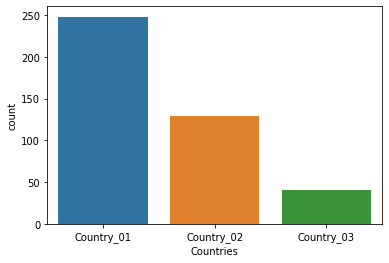

In [22]:
sns.countplot(x ='Countries', data = data)

<AxesSubplot:xlabel='Local', ylabel='count'>

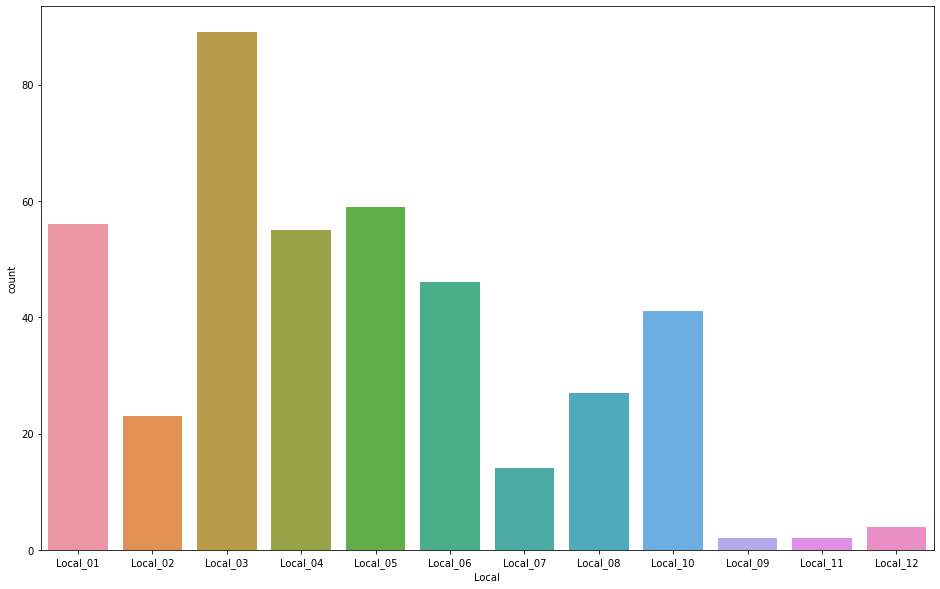

In [23]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.countplot(x ='Local', data = data)

<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

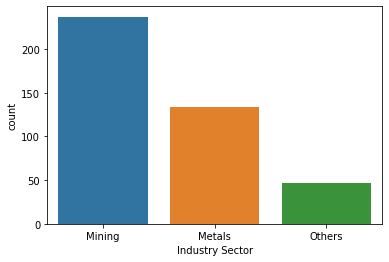

In [24]:
sns.countplot(x ='Industry Sector', data = data)

<AxesSubplot:xlabel='Accident Level', ylabel='count'>

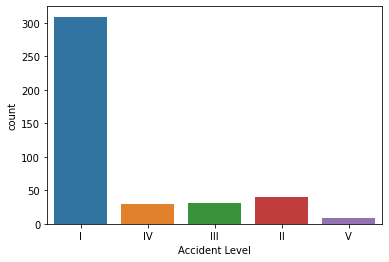

In [25]:
sns.countplot(x ='Accident Level', data = data)

<AxesSubplot:xlabel='Potential Accident Level', ylabel='count'>

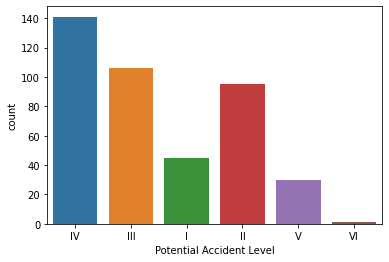

In [26]:
sns.countplot(x ='Potential Accident Level', data = data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

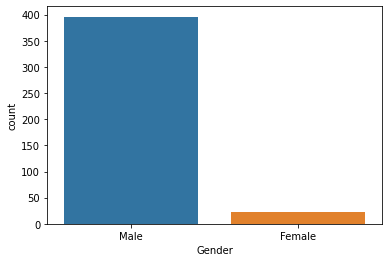

In [27]:
sns.countplot(x ='Gender', data = data)

<AxesSubplot:xlabel='Employee or Third Party', ylabel='count'>

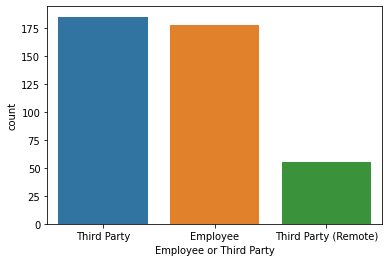

In [28]:
sns.countplot(x ='Employee or Third Party', data = data)

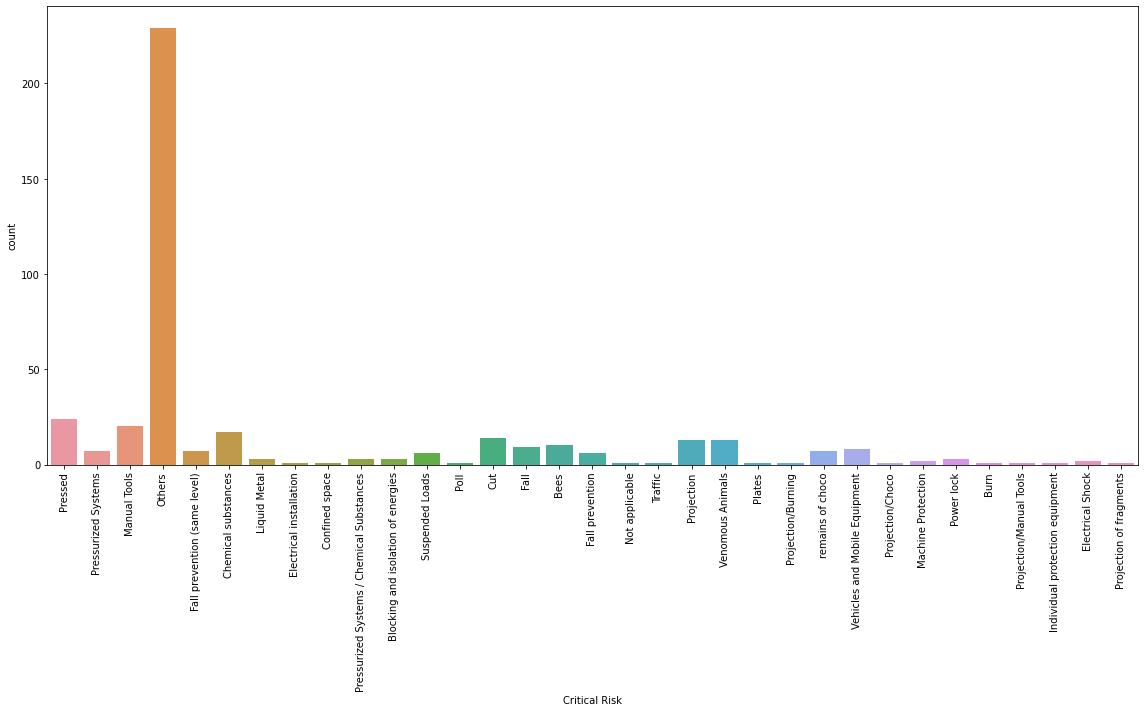

In [29]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.countplot(x ='Critical Risk', data = data)
plt.xticks(rotation=90)
plt.tight_layout()

In [30]:
wordcloud = WordCloud().generate(str(df['Description']))
fig = plt.gcf()
fig.set_size_inches( 20, 20)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

NameError: name 'df' is not defined

In [ ]:
sns.countplot(x ='Year', data = data)

<AxesSubplot:xlabel='Month', ylabel='count'>

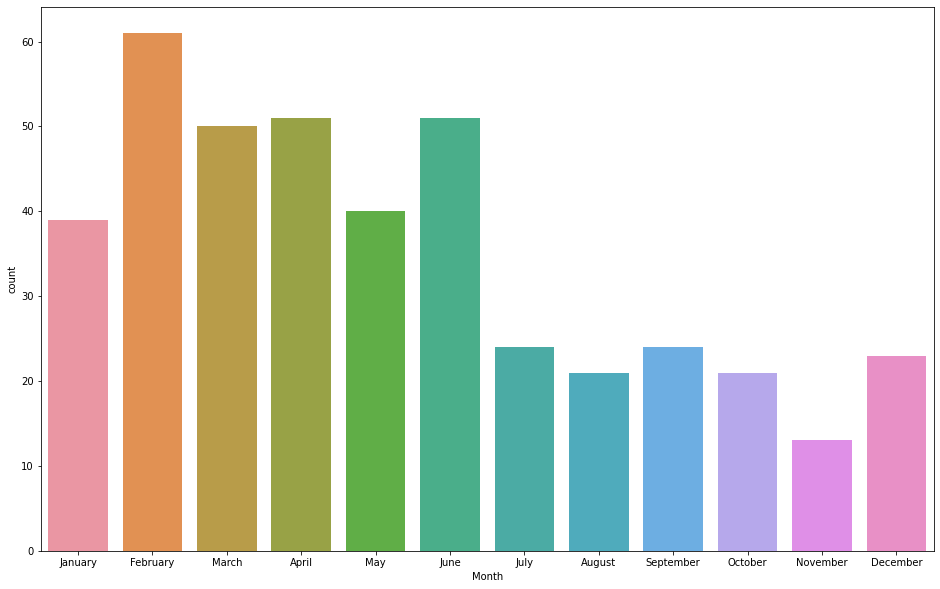

In [31]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.countplot(x ='Month', data = data)

<AxesSubplot:xlabel='Day', ylabel='count'>

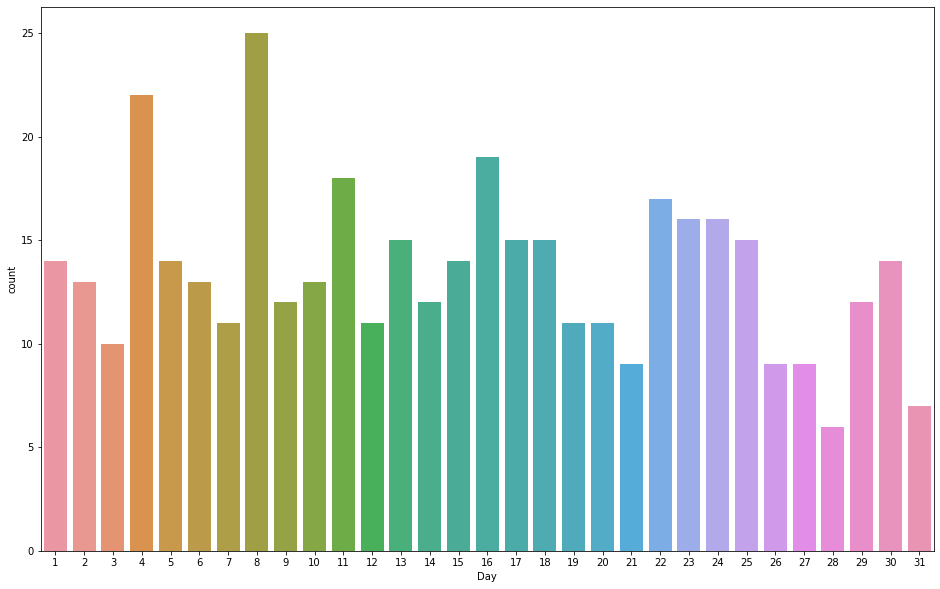

In [32]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.countplot(x ='Day', data = data)